# Prediction using Unsupervised ML
### From the given ‘Iris’ dataset, predict the optimum number of clusters & represent it visually.

Link for the data - https://bit.ly/3kXTdox

### Subhasish Pramanik
### Data Sience & Business Analytics
### GRIP @ The Sparks Foundation

## Importing Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans

## Uploading the data from the source

In [4]:
data = pd.read_csv("Iris.csv")
print("Data taken successfully")
data.head(10)

Data taken successfully


,Id,Sepal Length Cm,SepalWidthCm,Petal Length Cm,Petal Width Cm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               150 non-null    int64  
 1   Sepal Length Cm  150 non-null    float64
 2   SepalWidthCm     150 non-null    float64
 3   Petal Length Cm  150 non-null    float64
 4   Petal Width Cm   150 non-null    float64
 5   Species          150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


## Imaging the Dataset

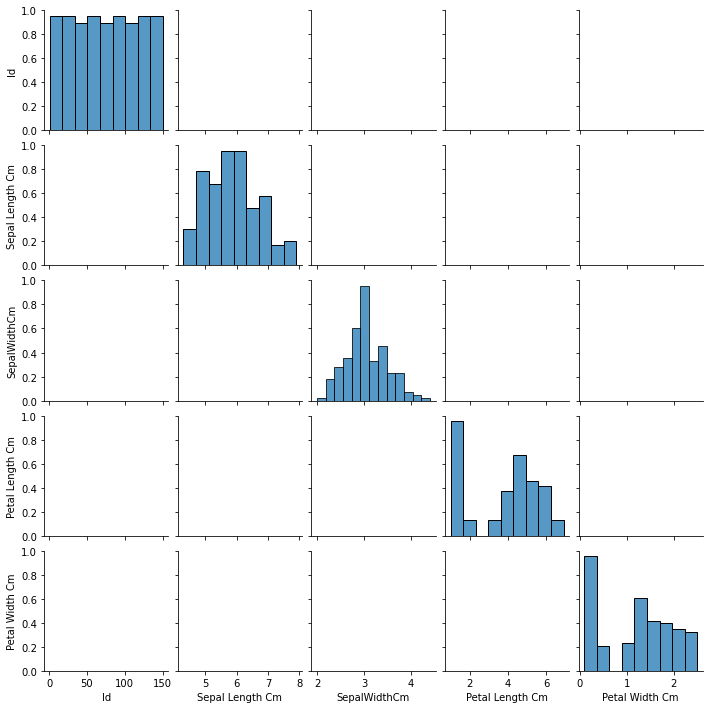

In [6]:
sns.pairplot(data, height=2, kind='ticks')

## Deciding the best number of Clusters & K-Means classification

In [7]:
x = data.iloc[:, [0, 1, 2, 3]].values
kmeans = KMeans(n_clusters=9)
kmeans.fit(x)

KMeans(n_clusters=9)

In [8]:
y_kmeans = kmeans.predict(x)

## Plotting the Dataset

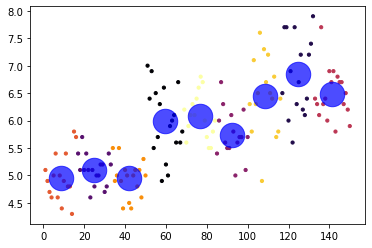

In [9]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans, s=10, cmap='inferno')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0],centers[:, 1],c='blue', s=600, alpha=0.7)

## Deciding the best number of cluster using Elbow Method

In [10]:
kmeans.inertia_

3563.702614379085

In [11]:
wss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i).fit(x)
    wss.append([i, kmeans.inertia_])

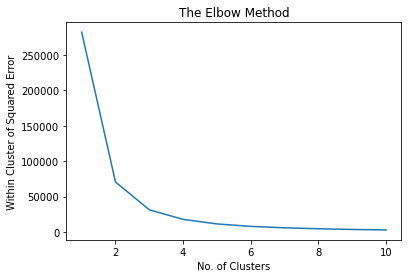

In [12]:
plt.plot(pd.DataFrame(wss)[0],pd.DataFrame(wss)[1])
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Within Cluster of Squared Error')
plt.show()

So, from the Elbow Method, we choose the number of Clusters to be 3.

## Using K-Means Classifier on IRIS Dataset

In [13]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, 
                n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Visual depiction of Clusters & their Centroids

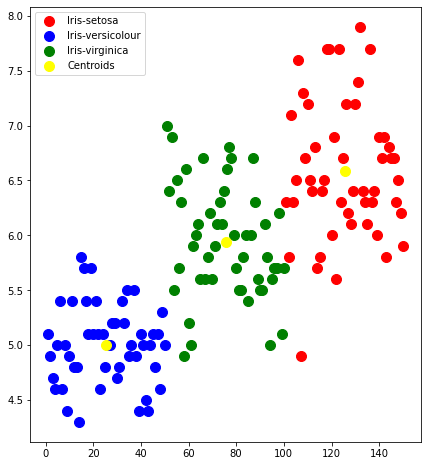

In [14]:
plt.figure(figsize=(7,8))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.legend()

# Thank You